## CSCS530 Winter 2015
#### Complex Systems 530 - Computer Modeling of Complex Systems (Winter 2015)

  * Course ID: CMPLXSYS 530
  * Course Title: Computer Modeling of Complex Systems
  * Term: Winter 2015
  * Schedule: Wednesdays and Friday, 1:00-2:30PM ET
  * Location: 120 West Hall (http://www.lsa.umich.edu/cscs/research/computerlab)
  * Teachers: [Mike Bommarito](https://www.linkedin.com/in/bommarito) and [Sarah Cherng](https://www.linkedin.com/pub/sarah-cherng/35/1b7/316)

#### [View this repository on NBViewer](http://nbviewer.ipython.org/github/mjbommar/cscs-530-w2015/tree/master/)

## Reading Model Results

  In this notebook, we'll learn a common pattern for reading the results of a model run.  Specifically, we'll:
        
  * find all model output directories
  * read the model output into a new dataset
  * visualize the results
  * perform a statistical test

In [105]:
# Imports
import matplotlib.pyplot as plt
import numpy
import pandas
import scipy
import scipy.stats


## Loading Model Results

  First, we need to find the list of all directories in our model output folder from the ``001-storing-model-results`` notebook.  We can do this using the ``glob`` and ``os``  modules, which will allow us to work with directories and list their contents.

In [5]:
import os

# Using os.listdir to show the current directory
os.listdir("./")

['002-reading-model-results.ipynb',
 '001-storing-model-results.ipynb',
 'output',
 'hiv_model.pyc',
 '.ipynb_checkpoints',
 'hiv_model.py']

In [8]:
# Using os.listdir to show the output directory
os.listdir("output")[0:5]

['run-20150318-86',
 'run-20150318-97',
 'run-20150318-0',
 'run-20150318-77',
 'run-20150318-95']

In [9]:
import glob

# Using glob to list the output directory
glob.glob("output/run-*")[0:5]

['output/run-20150318-86',
 'output/run-20150318-97',
 'output/run-20150318-0',
 'output/run-20150318-77',
 'output/run-20150318-95']

## Using os.path.join and os.path.basename

  We can also create paths and navigate directory trees using ``os.path.join``.  This method helps build file and directory paths, like we see below.

In [13]:
run_directory = os.listdir("output")[0]
print(run_directory)
print(os.path.join(run_directory,
                   "parameters.csv"))
             

run-20150318-86
run-20150318-86/parameters.csv


In [25]:
print(run_directory)
print(os.path.basename(run_directory))

output/run-20150318-94
run-20150318-94


### Iterating through model run directories
 
  Next, once we are able to "find" all model run directories, we need to iterate through them and read all data from them.  In the cells, we create data frames for each CSV output file from out ``001-storing-model-results`` notebook.

In [101]:
# Create "complete" data frames
run_data = []
all_timeseries_data = pandas.DataFrame()
all_interaction_data = pandas.DataFrame()


# Iterate over all directories
for run_directory in glob.glob("output/run*"):
    # Get the run ID from our directory name
    run_id = os.path.basename(run_directory)
    
    # Load parameter and reshape
    run_parameter_data = pandas.read_csv(os.path.join(run_directory, "parameters.csv"))
    run_parameter_data.index = run_parameter_data["parameter"]
    
    # Load timeseries and interactions
    run_interaction_data = pandas.read_csv(os.path.join(run_directory, "interactions.csv"))
    run_interaction_data["run"] = run_id
    run_ts_data = pandas.read_csv(os.path.join(run_directory, "timeseries.csv"))
    run_ts_data["run"] = run_id
    
    # Flatten parameter data into interaction and TS data
    for parameter_name in run_parameter_data.index:
        run_ts_data.loc[:, parameter_name] = run_parameter_data.loc[parameter_name, "value"]
        
    if run_interaction_data.shape[0] > 0:
        for parameter_name in run_parameter_data.index:
            run_interaction_data.loc[:, parameter_name] = run_parameter_data.loc[parameter_name, "value"]
    
    # Store raw run data
    run_data.append({"parameters": run_parameter_data,
                    "interactions": run_interaction_data,
                    "timeseries": run_ts_data})
    
    # Update final steps
    all_timeseries_data = all_timeseries_data.append(run_ts_data)
    all_interaction_data = all_interaction_data.append(run_interaction_data)

In [102]:
# let's see how many records we have.
print(all_timeseries_data.shape)
print(all_interaction_data.shape)

(12000, 16)
(15602, 18)


In [112]:
# Let's see what the data looks like.
all_timeseries_data.head()

,Unnamed: 0,num_infected,num_interactions,num_interactions_condoms,run,condom_cost,max_prob_hookup,min_condom_budget,min_prob_hookup,max_condom_budget,min_subsidy,max_subsidy,grid_size,prob_transmit,prob_transmit_condom,num_people
0,0,1,1,1,run-20150318-97,1,0.2,0,0,1,1,1,10,0.9,0.1,10
1,1,1,1,1,run-20150318-97,1,0.2,0,0,1,1,1,10,0.9,0.1,10
2,2,1,1,1,run-20150318-97,1,0.2,0,0,1,1,1,10,0.9,0.1,10
3,3,1,1,1,run-20150318-97,1,0.2,0,0,1,1,1,10,0.9,0.1,10
4,4,1,1,1,run-20150318-97,1,0.2,0,0,1,1,1,10,0.9,0.1,10


In [114]:
all_interaction_data.head()

,Unnamed: 0,agent_a,agent_b,condom_cost,grid_size,is_transmission,max_condom_budget,max_prob_hookup,max_subsidy,min_condom_budget,min_prob_hookup,min_subsidy,num_people,prob_transmit,prob_transmit_condom,run,time,use_condom
0,0,2,5,1,10,False,1,0.2,1,0,0.0,1,10,0.9,0.1,run-20150318-97,0,True
1,1,5,8,1,10,False,1,0.2,1,0,0.0,1,10,0.9,0.1,run-20150318-97,94,True
0,0,5,9,1,10,True,1,1.0,1,0,0.8,1,10,0.9,0.1,run-20150318-0,0,True
1,1,5,7,1,10,False,1,1.0,1,0,0.8,1,10,0.9,0.1,run-20150318-0,1,True
2,2,5,9,1,10,False,1,1.0,1,0,0.8,1,10,0.9,0.1,run-20150318-0,1,True


In [107]:
%matplotlib inline
# let's use groupby to find some information.
last_step_data = all_timeseries_data.groupby("run").tail(1)

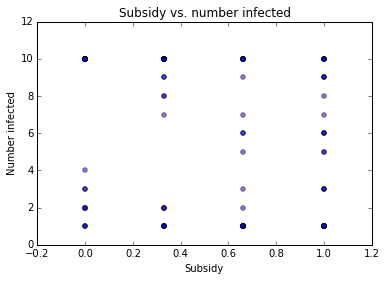

In [110]:
# Simple plot
f = plt.figure()
plt.scatter(last_step_data["min_subsidy"],
           last_step_data["num_infected"],
            alpha=0.5)
plt.xlabel("Subsidy")
plt.ylabel("Number infected")
plt.title("Subsidy vs. number infected")

In [129]:
# Let's use groupby with **multiple** variables now.
mean_infected_by_subsidy = all_timeseries_data.groupby(["run", "min_subsidy", "min_prob_hookup"])["num_infected"].mean()
std_infected_by_subsidy = all_timeseries_data.groupby(["run", "min_subsidy", "min_prob_hookup"])["num_infected"].std()
infected_by_subsidy = pandas.concat((mean_infected_by_subsidy,
                                    std_infected_by_subsidy), axis=1)
infected_by_subsidy.columns = ["mean", "std"]
infected_by_subsidy.head()

,,,mean,std
run,min_subsidy,min_prob_hookup,,
run-20150318-0,1,0.8,6.04,3.247128
run-20150318-1,0,0.0,1.00,0.000000
run-20150318-10,0,0.0,1.04,0.196946
run-20150318-100,1,0.0,1.00,0.000000
run-20150318-101,1,0.4,2.12,1.423327


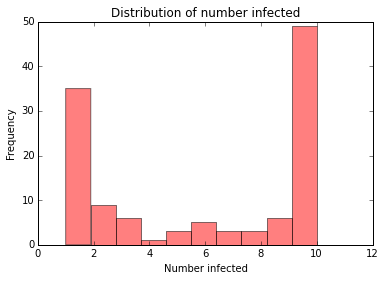

In [134]:
# Plot a distribution
f = plt.figure()
_ = plt.hist(last_step_data["num_infected"].values,
         color="red",
         alpha=0.5)
plt.xlabel("Number infected")
plt.ylabel("Frequency")
plt.title("Distribution of number infected")

In [140]:
# Perform distribution tests for no subsidy vs. some subsidy
no_subsidy_data = last_step_data.loc[last_step_data["min_subsidy"] == 0,
                                     "num_infected"]
some_subsidy_data = last_step_data.loc[last_step_data["min_subsidy"] > 0,
                                     "num_infected"]

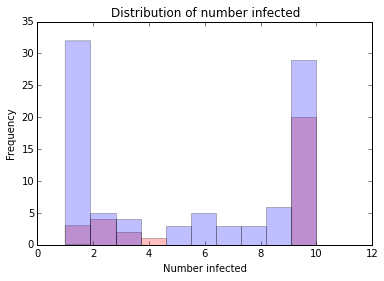

In [153]:
# Plot a distribution
f = plt.figure()
_ = plt.hist(no_subsidy_data.values,
         color="red",
         alpha=0.25)
_ = plt.hist(some_subsidy_data.values,
            color="blue",
            alpha=0.25)
plt.xlabel("Number infected")
plt.ylabel("Frequency")
plt.title("Distribution of number infected")

In [147]:
# Test for normality
print(scipy.stats.shapiro(no_subsidy_data))
print(scipy.stats.shapiro(some_subsidy_data))

# Test for equal variances
print(scipy.stats.levene(no_subsidy_data, some_subsidy_data))

(0.6422606706619263, 2.495028184057446e-07)
(0.7675792574882507, 1.284632400455621e-10)
(5.5031636888978275, 0.020650644408257007)


In [148]:
# Perform t-test
print(scipy.stats.ttest_ind(no_subsidy_data, some_subsidy_data))

# Perform rank-sum test
print(scipy.stats.ranksums(no_subsidy_data, some_subsidy_data))

(2.3313286379544826, 0.021432766613366575)
(2.8181818181818183, 0.0048296452559399346)
